In [642]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  2 03:32:51 2018

@author: ks
"""

# setup the matplotlib graphics library and configure it to show figures inline in the notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# make qutip available in the rest of the notebook
from qutip import *

In [643]:
#def compute(w1list, w2, w3, g12, g13):
def compute(waq_list, wc, wq, g, gac, N, M):
    # Pre-compute operators for the hamiltonian
#    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
#    sx1 = tensor(sigmax(), qeye(2), qeye(2))

#    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
#    sx2 = tensor(qeye(2), sigmax(), qeye(2))

#    sz3 = tensor(qeye(2), qeye(2), sigmaz())
#    sx3 = tensor(qeye(2), qeye(2), sigmax())

    a   = tensor(destroy(N), qeye(2), qeye(2)) # destroy of cavity
    sm  = tensor(qeye(N), destroy(2), qeye(2)) # destroy of qubit
    sam = tensor(qeye(N), qeye(2), destroy(2)) # destroy of ancilla

    nq  = tensor(qeye(N), sigmaz(), qeye(2)) # number of qubit
    #nq  = tensor(qeye(N), destroy(2).dag() * destroy(2), qeye(2)) # number of qubit
    nc  = tensor(destroy(N).dag() * destroy(N), qeye(2), qeye(2)) # number of cavity
    naq  = tensor(qeye(N), qeye(2), sigmaz()) # number of ancilla
    #naq = tensor(qeye(N), qeye(2), destroy(2).dag() * destroy(2)) # number of qubit

    idx = 0
    evals_mat = np.zeros((len(waq_list),N*2*2))
    for waq in waq_list:

        # evaluate the Hamiltonian
        # H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3
        # H = waq * naq + wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())
        H = 0.5 * (waq-M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())
        # H = 0.5 * (waq-M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() * sam + a * sam.dag())
       
        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

#        print(len(evals))
        evals_mat[idx,:] = np.real(evals)
    
        idx += 1
    return evals_mat, ekets

In [669]:
wc  = 0.8 * 2 * np.pi   # cavity frequency
wq  = 1.0 * 2 * np.pi   # qubit frequency
g   = 0.6 * 2 * np.pi   # cavity-qubit coupling strength
gac = 0.02 * 2 * np.pi  # ancilla-cavity coupling strength
N   = 20
M   = 0 * 2 * np.pi

waq_list = np.linspace(0, 5, 100) * 2.0 * np.pi # ancilla frequency range

In [670]:
evals_mat, ekets = compute(waq_list, wc, wq, g, gac, N, M)
print(evals_mat)

[[ -4.61862475  -4.61862475  -2.77964192 ... 114.9763115  116.70224178
  116.70224178]
 [ -4.77481137  -4.46345411  -2.93408006 ... 114.97936597 116.69915849
  116.73389765]
 [ -4.93162854  -4.31007148  -3.08683925 ... 114.95355467 116.72494519
  116.79128129]
 ...
 [-19.99316128 -18.17959417 -14.44484971 ... 118.31767931 131.15622688
  131.34872595]
 [-20.15181795 -18.3382396  -14.60348387 ... 118.4761822  131.31464157
  131.507149  ]
 [-20.3104748  -18.49688544 -14.7621187  ... 118.63468869 131.47306132
  131.6655769 ]]


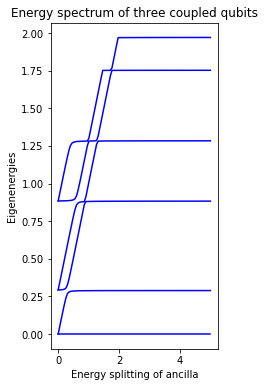

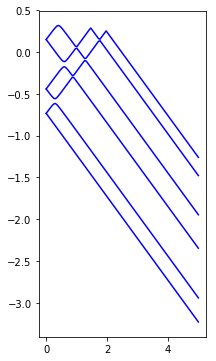

In [672]:
fig, ax = plt.subplots(figsize=(3,6))
fig, bx = plt.subplots(figsize=(3,6))
snum = 6

for n in range(snum):
    ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n] - evals_mat[:, 0]) / (2*np.pi), 'b')
    #ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n]) / (2*np.pi), 'b')

for n in range(snum):
    #ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n] - evals_mat[:, 0]) / (2*np.pi), 'b')
    bx.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n]) / (2*np.pi), 'b')
    
ax.set_xlabel('Energy splitting of ancilla')
ax.set_ylabel('Eigenenergies')
ax.set_title( 'Energy spectrum of three coupled qubits');

In [647]:
ekets[0] == ekets[1]

False

In [648]:
print(evals_mat[0][0]-evals_mat[0][1])

-9.769962616701378e-15


In [649]:
for J in range(0, 99):
    print((evals_mat[J][0] - evals_mat[J][1])/(2 * np.pi))

-1.5549378442710527e-15
-0.019830835957896715
-0.03965124507476991
-0.0594498371803281
-0.07921311115032556
-0.09892387922224792
-0.11855887204922685
-0.1380848227340146
-0.15745168342722207
-0.17658027266459536
-0.19533881234690506
-0.21349736444091422
-0.23064289328743873
-0.24605776818329467
-0.2587253756589807
-0.26788968881262376
-0.27383616038844594
-0.27756437154749697
-0.2799646193558746
-0.28158598381623895
-0.28273500077465774
-0.28358368492055663
-0.28423239518391935
-0.2847424250648165
-0.28515287544237816
-0.28548967825265814
-0.2857706250580796
-0.28600828708346937
-0.2862117770706357
-0.28638784981546084
-0.2865416112769092
-0.2866769883042017
-0.28679704758243324
-0.28690421704436936
-0.2870004426612456
-0.28708730148095385
-0.28716608445593444
-0.28723785803580454
-0.2873035105886655
-0.2873637878209425
-0.2874193201098687
-0.28747064381552967
-0.2875182180590003
-0.2875624380491016
-0.28760364575558495
-0.28764213852307496
-0.2876781760732513
-0.28771198623507394
-0.2